# AARL Take-Home: Happy and Sad Faces

This notebook describes a dataset consisting of 20 happy and sad faces, each of those represented by a $9 \times 9$ image with only two colors, and a neural network trained to distinguish which ones are happy and sad. The neural network is trained by using only 10 of these images (the train set), with the purpose of correctly inferring which of the other ones are happy or sad (the test set).

The development of training code and the creation of these images was done by Mikey Ferguson. The code for "spying" on the value of parameters of model was developed by Yuqin Yang and Thiago Serra. Thiago Serra has complemented this notebook with the present description and additional comments in the code.

In [1]:
# This cell imports some of the libraries that will be used

import torch
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import torch.nn as nn
from torch import relu, sigmoid, tanh, selu
import os

import numpy as np
import matplotlib.pyplot as plt
torch.manual_seed(42)
np.random.seed(0)

In [2]:
# This cell contains the 10 images that will be used for training

x_train = torch.tensor(
[
    
[    
[[0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0, 1, 0],
[0, 0, 1, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 1, 1, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0]]
],
    
[    
[[0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 1, 1, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0]]
],
    
[    
[[0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0, 1, 0],
[0, 0, 1, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 1, 1, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0]]
],

[    
[[0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 1, 0, 0],
[0, 0, 1, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0, 1, 0],
[0, 0, 1, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 1, 1, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0]]
],
    
[    
[[0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 1, 0, 0],
[0, 0, 1, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 1, 1, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0]]
],
    
[    
[[0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 1, 0, 0],
[0, 0, 1, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 1, 1, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0]]
],
    
[    
[[0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 1, 0, 0],
[0, 0, 1, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 1, 1, 1, 1, 0, 0],
[0, 0, 1, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0]]
],

[    
[[0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 1, 1, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0]]
],
    
[    
[[0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 1, 1, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0]]
],

[    
[[0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 1, 0, 0],
[0, 0, 1, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 1, 1, 1, 1, 0, 0],
[0, 1, 1, 0, 0, 0, 1, 1, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0]]
],


]
)

print(x_train.shape)

torch.Size([10, 1, 9, 9])


In [3]:
# This cell tells which faces are happy or sad in the training set
# The first five are happy, the next five are sad

y_train = torch.tensor([0])
# happy, unhappy
y_train = y_train.reshape(-1, 1).type(torch.FloatTensor)

In [4]:
# This cell contains the 10 images that will be used for testing
# Like before, the first five are happy and the next five are sad

x_test = torch.tensor(
[

[    
[[0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 1, 1, 0, 0, 0, 1, 1, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0, 1, 0],
[0, 0, 1, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 1, 1, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0]]
],

[    
[[0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 1, 0, 0],
[0, 0, 1, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 1, 0, 0],
[0, 0, 1, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 1, 1, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0]]
],

[    
[[0, 0, 1, 0, 0, 0, 1, 0, 0],
[0, 0, 1, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0, 1, 0],
[0, 0, 1, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 1, 1, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0]]
],

[    
[[0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0, 1, 0],
[0, 0, 1, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 1, 1, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0]]
],

[    
[[0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 1, 0, 0],
[0, 0, 1, 0, 1, 0, 1, 0, 0],
[0, 0, 0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 1, 1, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0]]
],

[    
[[0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 1, 0, 0],
[0, 0, 1, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 1, 1, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0]],
],

[    
[[0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 1, 0, 0],
[0, 0, 1, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 1, 1, 1, 1, 0, 0],
[0, 0, 1, 0, 0, 0, 1, 0, 0],
[0, 0, 1, 0, 0, 0, 1, 0, 0]],
],

[    
[[0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 1, 1, 0, 0, 0, 1, 1, 0],
[0, 0, 0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 1, 1, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0]]
],

[    
[[0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 1, 1, 0, 0, 0, 1, 1, 0],
[0, 1, 1, 0, 0, 0, 1, 1, 0],
[0, 0, 0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 1, 1, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0]]
],

[    
[[0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 1, 0, 0],
[0, 0, 1, 0, 1, 0, 1, 0, 0],
[0, 0, 0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 1, 1, 1, 1, 0, 0],
[0, 1, 1, 0, 0, 0, 1, 1, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0]]
]

]
)

x_test = x_test.type(torch.FloatTensor)
print(x_test.shape)

torch.Size([10, 1, 9, 9])


In [5]:
# This is where we say which images in the test set are happy or sad

y_test = torch.tensor([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])
y_test = y_test.view(-1,1).type(torch.FloatTensor)

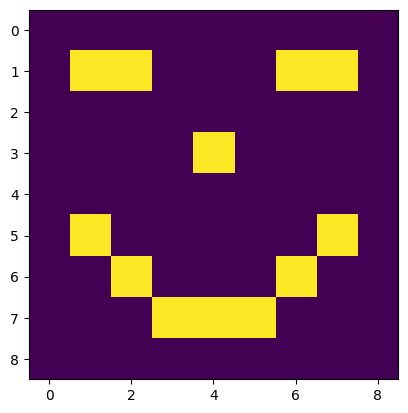

In [6]:
# We can use this cell to visualize each of these images
plt.imshow(  x_test[0][0]  );

In [7]:
# This cell defines the class of the neural network
#  The architecture and how it process inputs is specified
#  Unless stated othewise, all the comments below are Mikey's

class CNN(nn.Module):
    
    
    def __init__(self, convolutions = [(1, 2, 3)], hidden_layers = [98, 15, 15, 1]):
        # hidden layers - the dimensions of each of the layers of our neural network
        
        super(CNN, self).__init__()
        # now we can call all 'nn' methods and attributes
        
        self.convlist = convolutions
        # EDITED THIS LINE
        self.convolutions = nn.ModuleList()
        for index, convolution in enumerate(convolutions):
            
            if index>0:
                # then we have multiple convolutions - let's make sure the previous out_channels is consistent with our current number of in_channels
                assert convolutions[index-1][1] == convolutions[index][0], 'Convolutions inconsistent - make sure that each successive pairing of output channels and input channels is consistent'
            
            in_channels = convolution[0]
            out_channels = convolution[1]
            kernel_size = convolution[2]
            print("Kernel Size: ", kernel_size)
            
            self.convolutions.append(nn.Conv2d(in_channels, out_channels, kernel_size))
            nn.init.kaiming_normal_(self.convolutions[-1].weight)
            self.convolutions[-1].bias.data.fill_(0.01)
            # nn.init.kaiming_normal_(self.convolutions[-1].bias)
            # create a convolutional layer
            
        self.layer_dims = hidden_layers
        self.linears = nn.ModuleList()
        for this_dim, next_dim in zip(self.layer_dims, self.layer_dims[1:]):
            self.linears.append(nn.Linear(this_dim, next_dim))
            nn.init.kaiming_normal_(self.linears[-1].weight)
            self.linears[-1].bias.data.fill_(0.01)
            # nn.init.kaiming_normal_(self.linears[-1].bias)
            # create all of our linear forward functions
            
        self.initialized = False
        # we have not seen any images yet
        
        self.binary = hidden_layers[-1]==1
        # does our model have a binary output?
        
        self.neurons = [None for i in range(len(self.linears))]
        # to become a nested list of lists, each corresponding to the neuron activations of a given layer
        # add 1 to the len(self.linears) because we have not yet created the function mapping the post-convoluted image to the first hidden layer
            
            
    def forward(self, x):
        
        x = x.type(torch.FloatTensor)
        # convert to float
        
        if not self.initialized:
            # the network hasn't seen images yet - maybe they work with the current convolution setup, and maybe they don't...
            if x.shape[1] != self.convlist[0][0]:
                # the initial expected number of input channels
                # then we're gonna need a new convolutional layer up front
                new_conv = nn.Conv2d(in_channels = x.shape[1], out_channels = self.convlist[0][0], kernel_size=1)
                self.convolutions.insert(0, new_conv)
                # shove in this new convolutional layer at the beginning

        # THESE ARE DEBUG STATEMENTS TO SEE CONVOLUTIONAL LAYER INPUTS AND VALUES
        # print("input to conv", x)
        # print("self.convolutions", self.convolutions)
        
        for convolution in self.convolutions:
            x = convolution(x)

            # THESE ARE DEBUG STATEMENTS TO SEE CONVOLUTIONAL LAYER OUTPUTS AND CONV LAYER
            # print("Conv output", x)
            # print("conv layer", convolution)
            # apply each convolution
        
        # NOW... what on Earth could the dimensions of x be? Just have PyTorch figure it out...:-)
        
        num_pixels = 1
        for shape in x.shape[1:]:
            # I don't care about the first dimension (number of images) - this is only the number of pixels PER IMAGE
            num_pixels *= shape
        # total number of pixels
        
        if not self.initialized:
            # again, the network hasn't seen any images yet
            
            if self.layer_dims[0] != num_pixels:
                # then after our convolution, we are going to need to map from the input layer to the first hidden layer
                # i.e., the number of pixels post-convlution did not correspond with the number of neurons in our first hidden layer specified by user input
                
                self.neurons.append(None)
                # going to need another layer of neurons - keep track of that
                
                new_dim = x.view(-1, num_pixels)
                # unroll into vector of dimension num_pixels

                first_linear = nn.Linear(new_dim.shape[-1], self.layer_dims[0])
                # num_pixels --> num_neurons in first hidden layer
                self.linears.insert(0, first_linear)
                # shove this linear function in at the beginning
            
            # otherwise, no need to create a whole new linear function
        
            self.initialized = True
            # we have the first (potentially) required linear function and the first (potentially) required convolutional layer - do not create those again
        
        x = x.view(-1, num_pixels)
        # reshape x so we can feed it through our network
        
        for index, linear_func in enumerate(self.linears):
            # go through all of our linear functions
            if index == len(self.linears) - 1:
                # last layer
                x = linear_func(x)
                if self.binary:
                    x = sigmoid(x)
                    # binary output
            else:
                # not on the last layer
                x = linear_func(x)
                x = relu(x)
                # relu activation
            self.neurons[index]=(x.detach().tolist())
            # keep track of the neuron activation
        
        return x
    # return the output
    
    
    def show_progression(self, x):
        # x is just one image
        
        assert len(x.shape)==4 and x.shape[0]==1, "show_progression method will only deal with one image at once - if you think you only have one, wrap it in an outer tensor."
        assert self.initialized, "Network has not yet been trained."
        
        print('Original Image:')
        plt.imshow(x[0][0]) # Changed Mikey's code, which was: plt.imshow(x[0].permute(1,2,0))
        plt.show()
        
        # editing (printing original value)
        layer = x.detach().tolist()[0]
        print(layer)
        
        print('\n')
        
    
        x = x.float()
        # for some reason we need the preceding line of code if we're about to convolute; otherwise the convolution will hate us...
        for index,convolutions in enumerate(self.convolutions):
            # testing
            print(x)
            
            print(f'Convolution {index + 1}:')
            x = convolutions(x)
            # apply the convolution
            
            # try to print the value (editing)
            layer = x.detach().tolist()[0]
            print(f'Convolution {index+1}:')
            print(x.shape)
            
            #print([round(n, 5) for n in layer])
            print(layer)
            
            copy = x.permute(1,0,2,3)
            # turn it into the dimensions necessary in order to show the image via matplotlib.pyplot
            for i in range(copy.shape[0]):
                # sort of think of this as how many 'colors'/output channels
                plt.imshow(copy.detach()[i][0]) # Changed Mikey's code, which was: plt.imshow(copy.detach()[i].permute(1,2,0))
                plt.show()
            print('\n')
        
        num_pixels = 1
        for shape in x.shape[1:]:
            # I don't care about the first dimension (number of images) - this is only the number of pixels PER IMAGE
            num_pixels *= shape
        # total number of pixels
        
        x = x.view(-1, num_pixels)
        print(x)
        # reshape x so we can feed it through our network
        
        for index, linear_func in enumerate(self.linears):
            # go through all of our linear functions
            if index == len(self.linears) - 1:
                # last layer
                x = linear_func(x)
                x = sigmoid(x)
                # binary output
            else:
                # not on the last layer
                x = linear_func(x)
                x = relu(x)
                # relu activation
            layer = x.detach().tolist()[0]
            print(f'Layer {index+1}:')
            print([round(n, 5) for n in layer])
            # print the (rounded) neuron activations
            print('\n')
        
        if self.binary:
            print('Prediction:', torch.round(x).item())
            # this is how you get either a zero or a 1
        else:
            print('Prediction:', torch.max(x, axis=1)[1].item())
            # print the index of the maximum value in the output tensor (the classification)

In [8]:
# Now we create an object based on the neural network class above

model = CNN()
print(model(x_test))

Kernel Size:  3
tensor([[0.5196],
        [0.5981],
        [0.4696],
        [0.4978],
        [0.5107],
        [0.4742],
        [0.6208],
        [0.4803],
        [0.3853],
        [0.5269]], grad_fn=<SigmoidBackward0>)


In [9]:
# This cell defines the function for training the neural network
#  If we were to "spy" on how the parameters of the neural network change over time,
#  This would be the place to do it
#  Unless stated otherwise, all the comments below are Mikey's

def train(model, x_train, y_train, x_test, y_test, num_epochs, lr, show_wrong=False):
    
    criterion = nn.BCELoss()
    # log of the probability
    
    optimizer = optim.Adam(model.parameters(), lr)
    # responsible for updating our convolutional layer, weight matrices, and bias vectors
    
    checkpoints = [i for i in range(num_epochs) if i % (num_epochs // 10) == 0]
    # 0%, 10%, 20%, etc. through training
    
    LOSS = []
    ACCURACY = []
    # keep track of these by the epoch
    
    for epoch in range(num_epochs):
        # go through all of our data this many times
        
        yhat = model(x_train)
        # obtain model prediction
        yhat = yhat.view(-1,1)
        
        loss = criterion(yhat, y_train)
        # compute the loss
        
        LOSS.append(loss.data)
        # keep track of the epoch loss
        
        optimizer.zero_grad()
        # refresh gradient
        
        loss.backward()
        # compute gradient
        
        # TS: At this point the gradient has been computed,
        #  but the parameters have not been updated yet
        
        optimizer.step()
        # update parameters
        
        # TS: At this point the parameters have been updated
        
        # NOW check the accuracy
        
        yhat_test = model(x_test)
        # obtain test data prediction
        yhat_test = yhat_test.view(-1,1)
        
        yhat_test = torch.round(yhat_test)
        # round to 0, 1 --> binary output
       
        num_correct = torch.sum(yhat_test==y_test)
        accuracy = num_correct / len(y_test)
        # count the number of testing inputs our model got correct
        
        ACCURACY.append(accuracy)
        # keep track of this epoch's accuracy
        
        # are we at a checkpoint?
        if epoch in checkpoints:
            print(f'{100*epoch//num_epochs}% through training...')
            
    # now all of our training is concluded

    print('loss data', LOSS)
    plt.plot(LOSS, 'rx')
    plt.xlabel('Epoch')
    plt.ylabel('Training Loss')
    plt.show()
    
    plt.plot(ACCURACY, 'go')
    plt.xlabel('Epoch')
    plt.ylabel('Validation Accuracy')
    plt.show()
    
    if show_wrong:
        print('\n')
        print('Incorrect Train Classifications:')
    
    train_incorrect = []
    # let's keep track of the images which our model could learn to classify correctly
    for image, classification in zip(x_train, y_train):
        image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
        z = model(image)
        yhat = torch.round(z)
        # 1D tensor because of batch size
        
        yhat=yhat.view(-1,1)
        y=classification.view(-1,1)
        
        if yhat.item()!=y.item():
            # then the trained model still cannot grasp this image
            train_incorrect.append(image)
            
            if show_wrong:
                plt.imshow(image[0].permute(1,2,0))
                plt.show()
                print(classification.item())
    
    if show_wrong:
        print('\n')
        print('Incorrect Test Classifications:')
        
    test_incorrect = []
    # let's keep track of the images which our model failed to classify correctly on the spot
    for image, classification in zip(x_test, y_test):
        image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
        z = model(image)
        yhat = torch.round(z)
        # 1D tensor because of batch size
        
        yhat=yhat.view(-1,1)
        y=classification.view(-1,1)
        
        if yhat.item()!=y.item():
            # then the model failed to classify this image
            test_incorrect.append(image)
            
            if show_wrong:
                plt.imshow(image[0].permute(1,2,0))
                plt.show()
                print(classification.item())
    
    if show_wrong:
        print('\n')
        
    return train_incorrect, test_incorrect

In [10]:
# Now we are training the neural network

# Here we define hyperparameters about training
num_epochs = 25
lr = 0.01
# Here we create a new object for the neural network
model = CNN()

# Now we will call the function above for training it
train_incorrect, test_incorrect = train(model, x_train, y_train, x_test, y_test, num_epochs, lr)

Kernel Size:  3


ValueError: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([10, 1])) is deprecated. Please ensure they have the same size.

In [ ]:
# If we are curious about which tests failed, we can look them up

if len(test_incorrect)>0:
    # This will show only the first test that was incorrect, in case there is one
    model.show_progression(test_incorrect[0])

## Looking into the parameters of the model

What if we wanted to spy on the model, to see how its parameters evolve over time?

In [ ]:
# With this piece of code, we can extract the parameters of the linear layers from the model
#  The parameters for each layer are saved in a different file

for i in range(3): # There are exactly three layers
    my_array = model.state_dict()['linears.'+str(i)+'.weight'].numpy()
    count = 0
    f = open("layer"+str(i+1)+".csv", "w")
    for array in my_array:
        f.write(str(count) + ',')
        for i in array:
            f.write(str(i) +  ", ")      
        f.write('\n')    
        count += 1
        # each represents a neuron
    f.close()

In [ ]:
# With this piece of code, we can extract the parameters of the convolutional layer from the model
#  One file is used for saving the weights
#  Another file is used for saving the biases

conv = model.convolutions[0] # there is only one convolution
f = open("conv.weight(OLD).csv", "w")
for a in range(2):
    for i in range(3):
        for b in range(3):
            f.write(str(conv.weight[a][0][i][b].item()) + ", ")
f.close()
    
f = open("conv.bias(OLD).csv", "w")
for i in range(2):
    f.write(str(conv.bias[i].item()) + ", ")
f.close()

In [ ]:
# We can also look into the weights and the gradient of the last linear layer as below

print(model.linears[-1].weight.grad)
print(model.linears[-1].weight)
# print(len(model.linears))

## Exercises

### 1: More information and better output about the parameters of the trained model

Note that the biases of the linear layers are not recorded in the cell that saves the weights of the linear layers in CSV files. In that file, the first record in each line is the number of the neuron, starting at zero. Immediately following that, we have the parameters. 

Can you copy that code below and modify it in such a way that:

1) There is an empty record between the number of the neuron and the weigths. For example, a line such as 

0, 1.3, 2.3, 4.5,

would instead look as follows:

0, , 1.3, 2.3, 4.5,

2) There is another empty record following the weights, which is followed by the bias of the corresponding neuron. For example, the line above may look like this if the bias for that neuron is -0.3:

0, , 1.3, 2.3, 4.5, , -0.3,

In [ ]:
# Your code goes here! :-)
for i in range(3): # There are exactly three layers
    my_array = model.state_dict()['linears.'+str(i)+'.weight'].numpy()
    bias_array = model.state_dict()['linears.'+str(i)+'.bias'].numpy()
    count = 0
    f = open("layer"+str(i+1)+".csv", "w")
    for array in my_array:
        # This portion was modified by adding a " ," string to separate neuron number and parameters
        f.write(str(count) + ',' + " ,")
        # This portion was modified by using the indices of the length/shape of the array.
        for i in range(len(array)):
            f.write(str(array[i]) +  ", ")
        f.write(", " + str(bias_array[count]))
        f.write('\n')    
        count += 1
        # each represents a neuron
    f.close()
    # print("array: ", array)
    # print("Bias: ", bias_array)


Moreover, if you look into the file produced with parameters of the convolutional layer, notice that they are in a single line. Not only that, but the two filters are not separated: it is all in that same line. Each filter consists of a square matrix of parameters.

Can you copy that code below and modify it in such a way that:

1) Each filter is recorded in a separate CSV file. Each file should have a square matrix with its parameters.

2) The bias is recorded as a single record below the filter, but separated from it with a line containing a single comma.

In [ ]:
# Your code goes here! :-)
conv = model.convolutions[0] # there is only one convolution
# f = open("conv.weight.csv", "w")
# print(conv.kernel_size)
# filterSize = fRow * fColumn
# print(len(conv.weight))

# This function separates the filters into their own files and restructures the parameters into square matrices. It also places the bias below the filter.
fRow, fColumn = conv.kernel_size
numFilters = len(conv.weight)
for filter in range(numFilters):
    f = open("conv.weight_bias.filter" + str(filter) + ".csv", "w")
    for i in range(fRow):
        for b in range(fColumn):
            f.write(str(conv.weight[filter][0][i][b].item()) + ", ")
        f.write('\n')
    f.write(", ")
    f.write('\n')
    f.write(str(conv.bias[filter].item()) + ", ")
f.close()



## 2: Tracking all parameter updates

What if we wanted to look at what happened in every step of the training? For example, by recordign all the gradients and all the parameters before, during, and after the training is over. In other words, for every update of the parameters, you save in file what was the gradient update and what is the new value of the parameters.

For this exercise, please note the following:

1) Because you will be changing a lot of things, please make sure to put comments along the code explaining what you changed

2) Because many files will be create, please make sure to create a system for that purpose: file names numbered from 0, for example

In [ ]:
# Your code goes here! :-)

# NOTE: I WROTE ALL OF MY COMMENTS IN CAPS
def train(model, x_train, y_train, x_test, y_test, num_epochs, lr, show_wrong=False):

    print('initial sigmoid', model(x_train))
    
    criterion = nn.BCELoss()
    # log of the probability
    
    optimizer = optim.Adam(model.parameters(), lr)
    # responsible for updating our convolutional layer, weight matrices, and bias vectors
    
    checkpoints = [i for i in range(num_epochs) if i % (num_epochs // 10) == 0]
    # 0%, 10%, 20%, etc. through training
    
    LOSS = []
    ACCURACY = []
    # keep track of these by the epoch

    # RECORDING PARAMETER VALUES BEFORE TRAINING
    # ====================================================================================
    # LINEAR LAYER WEIGHTS AND BIASES (2 LAYERS ONLY?)
    # WHY ARE THERE ONLY 2 LAYERS BEFORE TRAINING?
    # IT SEEMS THAT THESE ARE THE SECOND AND THIRD LAYERS (HENCE WHY I ADDED 1 TO LAYERS BELOW TO THE FILENAME)
    print("linear layers" + str(len(model.linears)))
    for layers in range(len(model.linears)):
        path = os.path.join("training_data", "linearLayer" + str(layers) + "BEFORE.csv")
        f = open(path, "w")
        for i in range(len(model.linears[layers].weight)):
            for j in range(len(model.linears[layers].weight[i])):
                f.write(str(model.linears[layers].weight[i][j].item()) + ", ")
            f.write(", ")
            f.write(str(model.linears[layers].bias[i].item()) + ", ")
            f.write('\n')
        f.close()

    
    # GRADIENTS
    # THERE IS NO BEFORE GRADIENT AS NO TRAINING HAS BEEN DONE TO OPTIMIZE THE VALUES OF THE PARAMETERS/BIASES.

    # CONVOLUTION LAYER PARAMETER VALUES
    conv = model.convolutions[0] # there is only one convolution
    # This function separates the filters into their own files and restructures the parameters into square matrices. It also places the bias below the filter.
    fRow, fColumn = conv.kernel_size
    numFilters = len(conv.weight)
    print("FILTER NUMBER", numFilters)
    for filter in range(numFilters):
        path = os.path.join("training_data", "convParam" + str(filter) + "BEFORE.csv")
        f = open(path, "w")
        for i in range(fRow):
            for b in range(fColumn):
                f.write(str(conv.weight[filter][0][i][b].item()) + ", ")
            f.write('\n')
        f.write(", ")
        f.write('\n')
        f.write(str(conv.bias[filter].item()) + ", ")
    f.close()

    # ====================================================================================
    
    for epoch in range(num_epochs):
        # go through all of our data this many times
        
        yhat = model(x_train)
        # obtain model prediction

        # THE LINE BELOW PRINTS THE SIGMOID VAL FOR EVERY TRAINING EPOCH
        print('sigmoid val', yhat)
        yhat = yhat.view(-1,1)
        
        loss = criterion(yhat, y_train)
        # compute the loss
        
        LOSS.append(loss.data)
        # keep track of the epoch loss
        
        optimizer.zero_grad()
        # refresh gradient
        
        loss.backward()
        # compute gradient
        
        # TS: At this point the gradient has been computed,
        #  but the parameters have not been updated yet
        
        optimizer.step()
        # update parameters

        
        # print(model.state_dict()['linears.'+str(0)+'.weight'].numpy())
        
        # TS: At this point the parameters have been updated
        
        # NOW check the accuracy
        
        yhat_test = model(x_test)
        # obtain test data prediction
        yhat_test = yhat_test.view(-1,1)

    
        
        yhat_test = torch.round(yhat_test)
        # round to 0, 1 --> binary output
       
        num_correct = torch.sum(yhat_test==y_test)
        accuracy = num_correct / len(y_test)
        # count the number of testing inputs our model got correct
        
        ACCURACY.append(accuracy)
        # keep track of this epoch's accuracy
        
        # are we at a checkpoint?
        if epoch in checkpoints:
            print(f'{100*epoch//num_epochs}% through training...')

        # TRACKING PARAMETERS AND GRADIENT DURING TRAINING HERE
        # ====================================================================================
        # LINEAR LAYER WEIGHTS AND BIASES
        print("linear layers" + str(len(model.linears)))
        for layers in range(len(model.linears)):
            path = os.path.join("training_data", "linearLayer" + str(layers) + "_" + str(epoch) + ".csv")
            f = open(path, "w")
            for i in range(len(model.linears[layers].weight)):
                for j in range(len(model.linears[layers].weight[i])):
                    f.write(str(model.linears[layers].weight[i][j].item()) + ", ")
                f.write(", ")
                f.write(str(model.linears[layers].bias[i].item()) + ", ")
                f.write('\n')
            f.close()

        # GRADIENTS LINEAR
        for layers in range(len(model.linears)):
            path = os.path.join("training_data", "lineargrad" + str(layers) + "_" + str(epoch) + ".csv")
            f = open(path, "w")
            for node in range(len(model.linears[layers].weight.grad)):
                for i in range(len(model.linears[layers].weight.grad[node])):
                    # for j in range(len(model.linears[layers].weight[i])):
                    f.write(str(model.linears[layers].weight.grad[node][i].item()) + ", ")
                f.write(", ")
                f.write(str(model.linears[layers].bias.grad[node].item()))
                f.write('\n')
            f.close()
            

        # CONVOLUTION LAYER PARAMETERS
        # DOES NOT CHANGE FOR SOME REASON.
        conv = model.convolutions[0] # there is only one convolution
        # This function separates the filters into their own files and restructures the parameters into square matrices. It also places the bias below the filter.
        fRow, fColumn = conv.kernel_size
        numFilters = len(conv.weight)
        for filter in range(numFilters):
            path = os.path.join("training_data", "convParam" + str(filter) + "_" + str(epoch) + ".csv")
            f = open(path, "w")
            for i in range(fRow):
                for b in range(fColumn):
                    f.write(str(conv.weight[filter][0][i][b].item()) + ", ")
                f.write('\n')
            f.write(", ")
            f.write('\n')
            f.write(str(conv.bias[filter].item()) + ", ")
        f.close()

        # CONVOLUTION LAYER GRADIENTS
        for filter in range(numFilters):
            path = os.path.join("training_data", "convGrad" + str(filter) + "_" + str(epoch) + ".csv")
            f = open(path, "w")
            for i in range(fRow):
                for b in range(fColumn):
                    f.write(str(conv.weight.grad[filter][0][i][b].item()) + ", ")
                f.write('\n')
            f.write('\n')
            f.write(str(conv.bias.grad[filter].item()))
        f.close()
        
        # ====================================================================================

    # FINAL VALUES
    # ====================================================================================
    # LINEAR LAYER PARAMS
    # THE FINAL WEIGHTS AND BIASES DATA IS THE LAST CSV FILE FOR WEIGHT.
    
    # GRADIENTS
    # THE FINAL LINEAR AND CL GRADIENT DATA IS THE LAST CSV FILE FOR LINEARGRAD AND CONVGRAD.

    # CONVOLUTIONAL LAYER PARAMS
    # THE FINAL CL WEIGHTS AND BIASES DATA IS THE LAST CSV FILES FOR CONVPARAMS.

    # ====================================================================================
    
    # now all of our training is concluded

    print('loss data', LOSS)
    plt.plot(LOSS, 'rx')
    plt.xlabel('Epoch')
    plt.ylabel('Training Loss')
    plt.show()
    
    plt.plot(ACCURACY, 'go')
    plt.xlabel('Epoch')
    plt.ylabel('Validation Accuracy')
    plt.show()
    
    if show_wrong:
        print('\n')
        print('Incorrect Train Classifications:')
    
    train_incorrect = []
    # let's keep track of the images which our model could learn to classify correctly
    for image, classification in zip(x_train, y_train):
        image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
        z = model(image)
        yhat = torch.round(z)
        # 1D tensor because of batch size
        
        yhat=yhat.view(-1,1)
        y=classification.view(-1,1)
        
        if yhat.item()!=y.item():
            # then the trained model still cannot grasp this image
            train_incorrect.append(image)
            
            if show_wrong:
                plt.imshow(image[0].permute(1,2,0))
                plt.show()
                print(classification.item())
    
    if show_wrong:
        print('\n')
        print('Incorrect Test Classifications:')
        
    test_incorrect = []
    # let's keep track of the images which our model failed to classify correctly on the spot
    for image, classification in zip(x_test, y_test):
        image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
        z = model(image)
        yhat = torch.round(z)
        # 1D tensor because of batch size
        
        yhat=yhat.view(-1,1)
        y=classification.view(-1,1)
        
        if yhat.item()!=y.item():
            # then the model failed to classify this image
            test_incorrect.append(image)
            
            if show_wrong:
                plt.imshow(image[0].permute(1,2,0))
                plt.show()
                print(classification.item())
    
    if show_wrong:
        print('\n')
        
    return train_incorrect, test_incorrect

# TESTING OF PARAMETER UPDATE TRACKING

# Here we define hyperparameters about training
num_epochs = 25
lr = 0.01

torch.manual_seed(42)
# Here we create a new object for the neural network
model = CNN()

# ADDED THIS LINE
# model(x_test)

# Now we will call the function above for training it
train_incorrect, test_incorrect = train(model, x_train, y_train, x_test, y_test, num_epochs, lr)

# PRINT STATEMENTS TO TEST AND UNDERSTAND THE ML MODEL.
# print(num_epochs)
# print(len(model.linears))
# print(model.linears[0].weight.grad)
# print(len(model.linears[0].weight.grad[0]))
# print(model.linears[0].weight)
# print(len(model.linears[0].weight))
# print(model.parameters)
# print(model.linears[0].weight[0][0])
# print(type(model.linears[0].weight[0][0]))
# print(model.linears[0].bias)
# print(model.linears[1].bias)
# print(model.linears[2].bias)

## 3: Anything else?

You are welcome, but not expected, to implement anything else based on the code above that you may find interesting.

In [ ]:
# TESTING FOR DIMENSION OF ARRAYS
print(len(conv.weight.grad[0]))
print(len(model.linears[0].weight.grad))
print(dir(model.convolutions[0]))
print(conv.weight.grad)
print(conv.weight[0][0][0][0])
print(conv.bias)

In [ ]:
# CODE THAT DOES NOT SEEM TO UPDATE PARAMETERS (OLD CODE)

# BEFORE TRAINING CODE ------------------------------------------------------------------------------------------------
# for array in my_array:
        # # This portion was modified by adding a " ," string to separate neuron number and parameters
        #     f.write(str(count) + ',' + " ,")
        #     # This portion was modified by using the indices of the length/shape of the array.
        #     for i in range(len(array)):
        #         f.write(str(array[i]) +  ", ")
        #     f.write(", " + str(bias_array[count]))
        #     f.write('\n')
        #     count += 1
        # f.close()

    # # WEIGHTS
    # path = os.path.join("training_data", "weight" +"BEFORE.csv")
    # f = open(path, "w")
    # for layers in range(len(model.linears)):
    #     for node in range(len(model.linears[layers].weight[0])):
    #         f.write(str(model.linears[layers].weight[0][node]) + ", ")
    #     f.write('\n')
    # f.close()
    # # THIS WILL REMOVE THE UNNECESSARY ", grad_fn=<SelectBackward0>)" VALUES
    # stringToDelete = ", grad_fn=<SelectBackward0>)"
    # tempFile = os.path.join("training_data", "weight" +"BEFOREtemp.csv")
    # with open(path, "r") as input:
    #     with open(tempFile, "w") as output:
    #         for line in input:
    #             line = line.replace(stringToDelete, "")
    #             output.write(line)
    # # replace file with original name
    # os.replace(tempFile, path)
    # # BIASES
    # path = os.path.join("training_data", "bias" + "BEFORE.csv")
    # f = open(path, "w")
    # for layers in range(len(model.linears)):
    #     for node in range(len(model.linears[layers].bias)):
    #         f.write(str(model.linears[layers].bias[node]) + ", ")
    #     f.write('\n')
    # f.close()
    # # THIS WILL REMOVE THE UNNECESSARY ", grad_fn=<SelectBackward0>)" VALUES
    # stringToDelete = ", grad_fn=<SelectBackward0>)"
    # tempFile = os.path.join("training_data", "bias" + "BEFOREtemp.csv")
    # with open(path, "r") as input:
    #     with open(tempFile, "w") as output:
    #         for line in input:
    #             line = line.replace(stringToDelete, "")
    #             output.write(line)
    # # replace file with original name
    # os.replace(tempFile, path)



# DURING TRAINING CODE ---------------------------------------------------------------------------------------


# print("Model's state_dict:")
        # for param_tensor in model.state_dict():
        #     print(param_tensor, "\t", model.state_dict()[param_tensor].size())
        
        # print()
        
        # for i in range(len(model.linears)): 
        #     my_array = model.state_dict()['linears.'+str(i)+'.weight.grad'].numpy()
        #     count = 0
        #     path = os.path.join("training_data", "linearLayer" + str(i) + "Grad_" + str(epoch) + ".csv")
        #     f = open(path, "w")
        #     for array in my_array:
        #     # This portion was modified by adding a " ," string to separate neuron number and parameters
        #         f.write(str(count) + ',' + " ,")
        #         # This portion was modified by using the indices of the length/shape of the array.
        #         for i in range(len(array)):
        #             f.write(str(array[i]) +  ", ")
        #         f.write('\n')
        #         count += 1
        #     f.close()
            
        # path = os.path.join("training_data", "lineargrad" + str(epoch) +".csv")
        # f = open(path, "w")
        # for layers in range(len(model.linears)):
        #     for node in range(len(model.linears[layers].weight.grad)):
        #         for grad in range(len(model.linears[layers].weight.grad[node])):
        #             f.write(str(model.linears[layers].weight.grad[node][grad]) + ", ")
        #     f.write('\n')
        # f.close()

# for i in range(len(model.linears)): 
        #     my_array = model.state_dict()['linears.'+str(i)+'.weight'].numpy()
        #     bias_array = model.state_dict()['linears.'+str(i)+'.bias'].numpy()
        #     count = 0
        #     path = os.path.join("training_data", "linearLayer" + str(i) + "_" + str(epoch) + ".csv")
        #     f = open(path, "w")
        #     for array in my_array:
        #     # This portion was modified by adding a " ," string to separate neuron number and parameters
        #         f.write(str(count) + ',' + " ,")
        #         # This portion was modified by using the indices of the length/shape of the array.
        #         for i in range(len(array)):
        #             f.write(str(array[i]) +  ", ")
        #         f.write(", " + str(bias_array[count]))
        #         f.write('\n')
        #         count += 1
        #     f.close()

In [ ]:
# EDITED (10/23/2023)
# -ADDED LINE IN CNN class init FUNCTION
# -ADDED LINE IN TRAINING CELL FUNCTION BEFORE THE TRAINING FUNCTION is called

In [ ]:
# 11/6/2023
# LOOK INTO OUTPUT VALUES FOR CONVOLUTIONAL LAYERS AND EVERY LINEAR LAYERS
# X IN EXCEL FILE IS WHAT GETS FED INTO THE NEXT LINEAR LAYERS
# LOOK INTO BCELOSS function and how to implement it in excel to compare grads/parameters.

In [ ]:
# 11/8/2023

# Look into BCELoss function in pytorch

In [ ]:
import torch.optim

help(torch.optim.Adam)